# Rock-Paper-Scissors Hand Gesture Classification

### Project Overview
This project builds a **visual recognition system** capable of identifying and classifying hand gestures representing Rock, Paper, and Scissors from image data using Convolutional Neural Networks (CNNs).

### Objectives
1. **Classification Engine**: Develop a CNN to accurately differentiate between three hand gesture categories
2. **Performance Validation**: Test the system against unseen images to measure reliability and error rate

### Deliverables
-  Functional classifier ready to receive image input and return gesture labels
-  Results visualization with success rates and accuracy breakdown per gesture

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
label_map = {"rock": 0, "paper": 1, "scissors": 2}
DATASET_PATH = "dataset"
for gesture in label_map:
    folder_path = os.path.join(DATASET_PATH, gesture)
    print(f"{gesture}: {len(os.listdir(folder_path))} images")

rock: 726 images
paper: 712 images
scissors: 750 images


In [4]:
IMAGE_SIZE = 64
data = []
labels = []
for gesture in label_map:
    folder_path = os.path.join(DATASET_PATH, gesture)
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        data.append(image)
        labels.append(label_map[gesture])

In [5]:
data = np.array(data) / 255.0
labels = np.array(labels)
print("Image data shape:", data.shape)
print("Labels shape:", labels.shape)

Image data shape: (2188, 64, 64, 3)
Labels shape: (2188,)


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

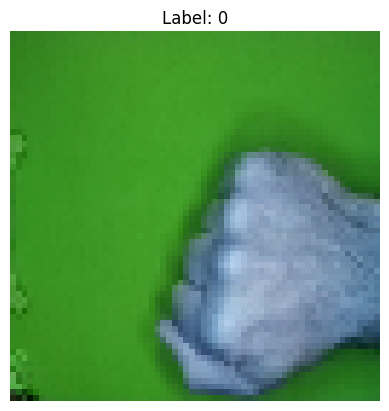

In [6]:
plt.imshow(data[0])
plt.title(f"Label: {labels[0]}")
plt.axis("off")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.2,random_state=42)
print("Training images:", X_train.shape)
print("Testing images:", X_test.shape)
print("Training labels:", y_train.shape)
print("Testing labels:", y_test.shape)

Training images: (1750, 64, 64, 3)
Testing images: (438, 64, 64, 3)
Training labels: (1750,)
Testing labels: (438,)


In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
print("Sample original label:", labels[0])
print("Sample one-hot label:", y_train[0])

Sample original label: 0
Sample one-hot label: [1. 0. 0.]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
print(model.summary())

C:\Users\arkad\PycharmProjects\rock_paper_scissors_cv\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,539 (6.20 MB)

 Trainable params: 1,625,539 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print("Model compiled and ready for training")

Model compiled and ready for training


In [13]:
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_data=(X_test, y_test),verbose=1)
print("\nTraining complete!")

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.7011 - loss: 0.7005 - val_accuracy: 0.8676 - val_loss: 0.4342
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9057 - loss: 0.2959 - val_accuracy: 0.9224 - val_loss: 0.2369
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9486 - loss: 0.1655 - val_accuracy: 0.9315 - val_loss: 0.2006
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9680 - loss: 0.1041 - val_accuracy: 0.9521 - val_loss: 0.1245
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9811 - loss: 0.0657 - val_accuracy: 0.9703 - val_loss: 0.0742
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9880 - loss: 0.0401 - val_accuracy: 0.9749 - val_loss: 0.0728
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9840 - loss: 0.0455 - val_accuracy: 0.9840 - val_loss: 0.0636
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9949 - loss: 0.0224 - val_accuracy: 0.9840 - v

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\n{'='*50}")
print(f"FINAL MODEL PERFORMANCE")
print(f"{'='*50}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")
print(f"{'='*50}\n")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9795 - loss: 0.0748

FINAL MODEL PERFORMANCE
Test Accuracy: 97.95%
Test Loss: 0.0748



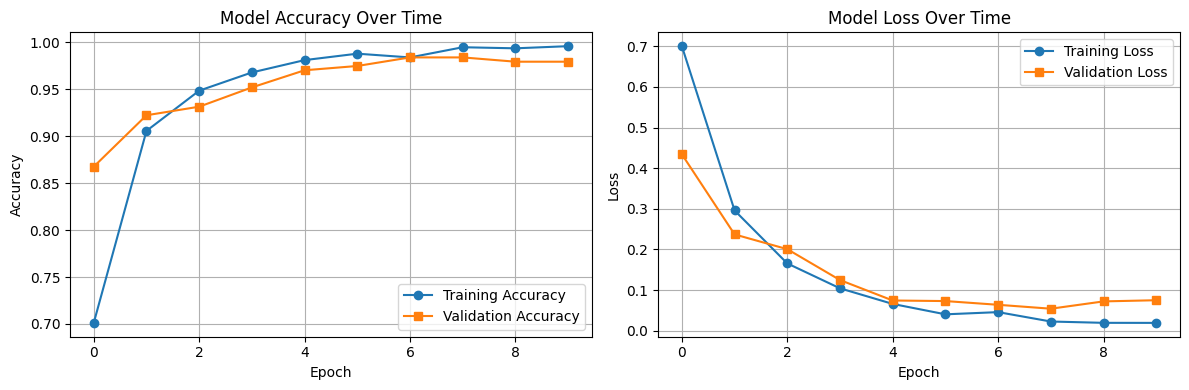

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


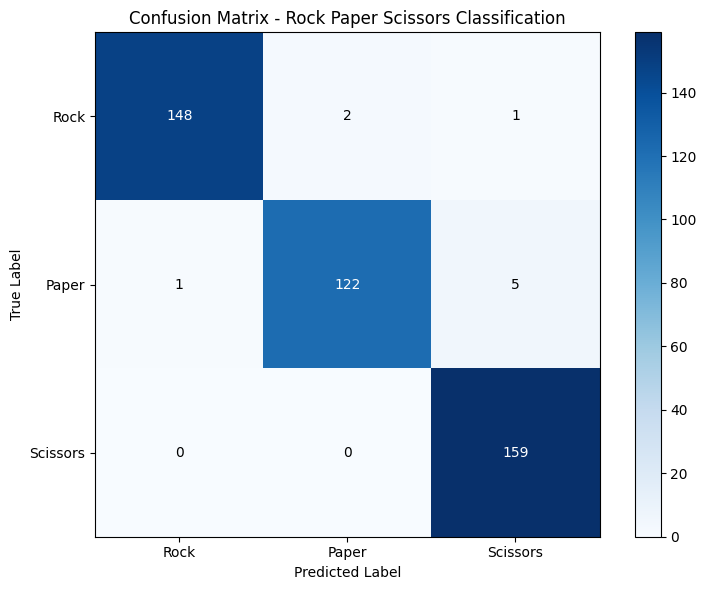


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Rock       0.99      0.98      0.99       151
       Paper       0.98      0.95      0.97       128
    Scissors       0.96      1.00      0.98       159

    accuracy                           0.98       438
   macro avg       0.98      0.98      0.98       438
weighted avg       0.98      0.98      0.98       438



In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Rock Paper Scissors Classification')
plt.colorbar()

classes = ['Rock', 'Paper', 'Scissors']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))
print("="*60)

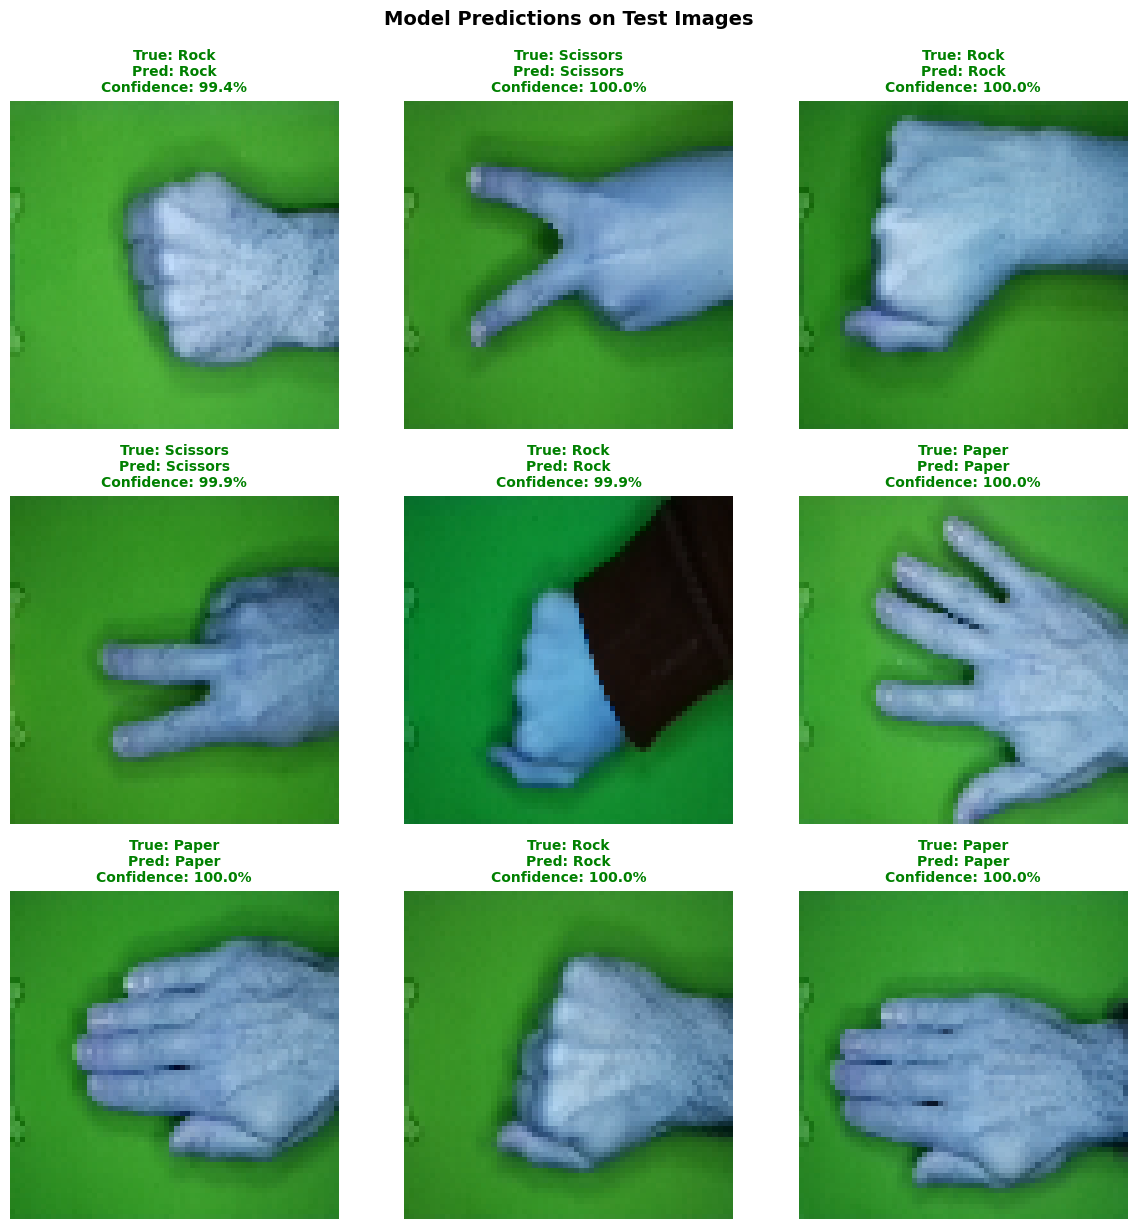

In [17]:
import random

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.ravel()
random_indices = random.sample(range(len(X_test)), 9)

for i, idx in enumerate(random_indices):
    image = X_test[idx]
    true_label = np.argmax(y_test[idx])

    prediction = model.predict(np.expand_dims(image, axis=0), verbose=0)
    predicted_label = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    axes[i].imshow(image)
    axes[i].axis('off')

    color = 'green' if predicted_label == true_label else 'red'

    title = f"True: {classes[true_label]}\nPred: {classes[predicted_label]}\nConfidence: {confidence:.1f}%"
    axes[i].set_title(title, color=color, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.suptitle('Model Predictions on Test Images', fontsize=14, fontweight='bold', y=1.02)
plt.show()

In [18]:
model.save('rock_paper_scissors_model.h5')
print("✅ Model saved as 'rock_paper_scissors_model.h5'")
print("\nYou can now load this model anytime with:")
print("model = tf.keras.models.load_model('rock_paper_scissors_model.h5')")

✅ Model saved as 'rock_paper_scissors_model.h5'

You can now load this model anytime with:
model = tf.keras.models.load_model('rock_paper_scissors_model.h5')


In [19]:
def predict_gesture(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img, verbose=0)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    gesture_names = ['Rock', 'Paper', 'Scissors']

    print(f"Predicted Gesture: {gesture_names[predicted_class]}")
    print(f"Confidence: {confidence:.2f}%")

    return gesture_names[predicted_class], confidence

print("Function created! You can now use it like:")
print("predict_gesture('path/to/your/image.jpg')")

Function created! You can now use it like:
predict_gesture('path/to/your/image.jpg')


## Final Conclusion

This project presents a complete, end-to-end implementation of a **hand gesture recognition system** capable of classifying **Rock, Paper, and Scissors** from image data using a **Convolutional Neural Network (CNN)**.

The system was developed from scratch, covering all stages of a standard machine learning pipeline: dataset inspection, image preprocessing, model architecture design, training, validation, and performance analysis. The trained model achieved a **test accuracy of 97.95% on unseen images**, demonstrating strong generalization and reliable classification performance. Model evaluation was performed using a held-out test set, confusion matrix analysis, and detailed classification metrics to ensure unbiased and transparent performance assessment.

This project illustrates how CNNs effectively capture spatial patterns in images—such as edges, contours, and hand shapes—to perform multi-class image classification. It also emphasizes best practices in machine learning, including proper train–test splitting, normalization, and monitoring of both training and validation metrics to detect overfitting.

Overall, the project showcases practical skills in **computer vision**, **deep learning**, and **model evaluation**, along with the ability to design, implement, and validate a production-ready image classification system. The solution is extensible and can be further enhanced through data augmentation, real-time inference, or deployment to web and mobile platforms.
